<a href="https://colab.research.google.com/github/Pawan-choudhary/Pandas-for-Data-Science/blob/main/Pandas_2%20with%20IBDb%20case%20study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
a = pd.DataFrame({'A':[10,30],'B':[20,40]})
b = pd.DataFrame({'A':[10,30],'C':[20,40]})

In [ ]:
a

,A,B
0,10,20
1,30,40


In [ ]:
b

,A,C
0,10,20
1,30,40


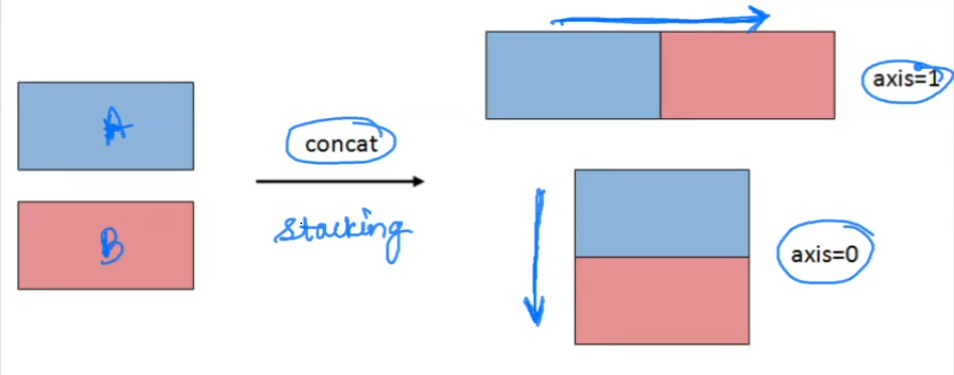

In [ ]:
# Dumb way of concat
pd.concat([a,b], axis = 0) # by default axis=0

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


In [ ]:
pd.concat([a,b], axis = 0,ignore_index=True)

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
2,10,NaN,20.0
3,30,NaN,40.0


In [ ]:
pd.concat([a,b], keys=['x','y'])

A     B     C
x 0  10  20.0   NaN
  1  30  40.0   NaN
y 0  10   NaN  20.0
  1  30   NaN  40.0

In [ ]:
pd.concat([a,b], keys=['x','y']).loc['x']

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN


In [ ]:
pd.concat([a,b], axis = 1)

,A,B,A,C
0,10,20,10,20
1,30,40,30,40


In [ ]:
pd.concat([a,b], axis = 0).loc[0]

,A,B,C
0,10,20.0,NaN
0,10,NaN,20.0


In [ ]:
# Inner concatenation : Joining inly common part
print(pd.concat([a,b],axis=0,join='inner'))
print(pd.concat([a,b],axis=0,join='inner',ignore_index=True))

    A
0  10
1  30
0  10
1  30
    A
0  10
1  30
2  10
3  30


In [ ]:
# Outer JOin
print(pd.concat([a,b],axis=0,join='outer'))


    A     B     C
0  10  20.0   NaN
1  30  40.0   NaN
0  10   NaN  20.0
1  30   NaN  40.0


In [ ]:
# left outer join :[A,B] -> Onl common part of B with A is added to the A

--------
Merging : 2-DataFrame,

df1 = users

df2 = mesgs

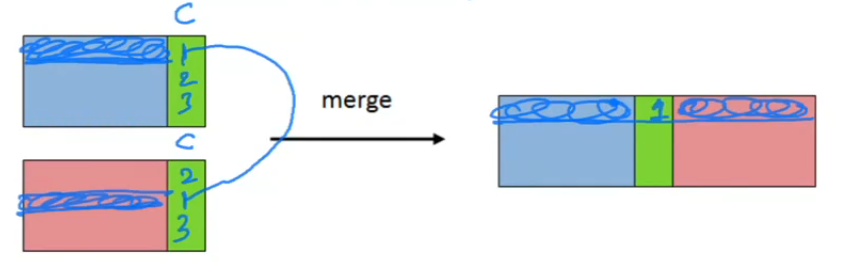

In [ ]:
users = pd.DataFrame({'userid':[1,2,3], 'name':['A','B','C']})

In [ ]:
users

,userid,name
0,1,A
1,2,B
2,3,C


In [ ]:
msgs = pd.DataFrame({'userid':[1,1,2], 'msg':['hello','bye','hi']})

In [ ]:
msgs

,userid,msg
0,1,hello
1,1,bye
2,2,hi


In [ ]:
pd.concat([users,msgs],axis=1) 

,userid,name,userid,msg
0,1,A,1,hello
1,2,B,1,bye
2,3,C,2,hi


This concat Doesn't make any sence.

Let's try merge

In [ ]:
msgs.merge(users,on = 'userid') # We added users data to msgs

,userid,msg,name
0,1,hello,A
1,1,bye,A
2,2,hi,B


In [ ]:
users.merge(msgs,on = 'userid')

,userid,name,msg
0,1,A,hello
1,1,A,bye
2,2,B,hi


In [ ]:
users.rename(columns={'userid':'id'}, inplace=True)

In [ ]:
users

,id,name
0,1,A
1,2,B
2,3,C


In [ ]:
msgs

,userid,msg
0,1,hello
1,1,bye
2,2,hi


In [ ]:
# Meging same columns with different name
users.merge(msgs,left_on='id',right_on='userid')

,id,name,userid,msg
0,1,A,1,hello
1,1,A,1,bye
2,2,B,2,hi


In [ ]:
# inner, outer, left, right join

In [ ]:
users.merge(msgs,left_on='id',right_on='userid', how='inner') # inner-> Intersection

,id,name,userid,msg
0,1,A,1,hello
1,1,A,1,bye
2,2,B,2,hi


In [ ]:
users.merge(msgs,left_on='id',right_on='userid', how='outer') # outer-> union/doesn't delete anything

,id,name,userid,msg
0,1,A,1.0,hello
1,1,A,1.0,bye
2,2,B,2.0,hi
3,3,C,NaN,NaN


In [ ]:
# left, right


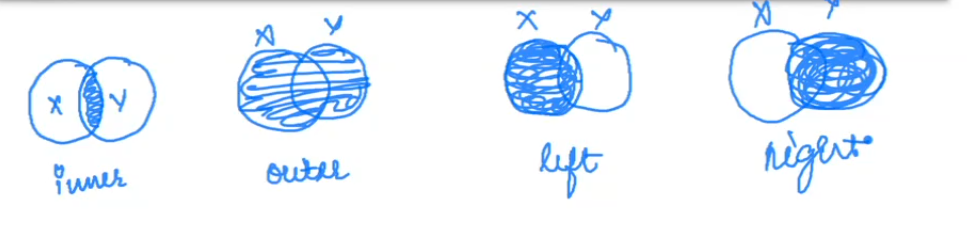

In [ ]:
print(users)
print(msgs)

   id name
0   1    A
1   2    B
2   3    C
   userid    msg
0       1  hello
1       1    bye
2       2     hi


In [ ]:
users.merge(msgs,left_on='id',right_on='userid', how='left') 

,id,name,userid,msg
0,1,A,1.0,hello
1,1,A,1.0,bye
2,2,B,2.0,hi
3,3,C,NaN,NaN


In [ ]:
users.merge(msgs,left_on='id',right_on='userid', how='right') 

,id,name,userid,msg
0,1,A,1,hello
1,1,A,1,bye
2,2,B,2,hi


In [ ]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 72.5MB/s]


In [ ]:
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 50.0MB/s]


In [ ]:
movies = pd.read_csv('movies.csv')

In [ ]:
movies

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,4736,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday
1461,4743,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday
1462,4748,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday
1463,4749,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday


In [ ]:
movies = pd.read_csv('movies.csv', index_col=0)


In [ ]:
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
directors = pd.read_csv("directors.csv", index_col=0)
directors.head()

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [ ]:
movies.shape

(1465, 11)

In [ ]:
directors.shape

(2349, 3)

In [ ]:
# movies directors -- left outer join
movies.merge(directors, how='left')

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,NaN,NaN
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,NaN,NaN
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,NaN,NaN
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,NaN,NaN
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,NaN,NaN
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,NaN,NaN
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,NaN,NaN
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,NaN,NaN


In [ ]:
movies['director_id'].nunique() # or len(movies['director_id'].unique())

199

In [ ]:
len(directors['id'].unique())

2349

In [ ]:
len(directors['director_name'].unique())

2349

In [ ]:
movies['director_id'].isin(directors['id'])

0       True
1       True
2       True
3       True
5       True
        ... 
4736    True
4743    True
4748    True
4749    True
4768    True
Name: director_id, Length: 1465, dtype: bool

In [ ]:
movies['director_id'].isin(directors['id']).unique()

array([ True])

In [ ]:
np.all(movies['director_id'].isin(directors['id'])) # Give True only if all values are True

True

In [ ]:
data = movies.merge(directors, how='left', left_on='director_id', right_on='id')

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male


id_x -> movieid

id_y -> director_id

In [ ]:
data.drop(['director_id','id_y'],axis=1,inplace=True)

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1341 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 148.8+ KB


In [ ]:
data.describe()

,id_x,budget,popularity,revenue,vote_average,vote_count,year
count,1465.000000,1.465000e+03,1465.000000,1.465000e+03,1465.000000,1465.000000,1465.000000
mean,45225.191126,4.802295e+07,30.855973,1.432539e+08,6.368191,1146.396587,2002.615017
std,1189.096396,4.935541e+07,34.845214,2.064918e+08,0.818033,1578.077438,8.680141
min,43597.000000,0.000000e+00,0.000000,0.000000e+00,3.000000,1.000000,1976.000000
25%,44236.000000,1.400000e+07,11.000000,1.738013e+07,5.900000,216.000000,1998.000000
50%,45022.000000,3.300000e+07,23.000000,7.578164e+07,6.400000,571.000000,2004.000000
75%,45990.000000,6.600000e+07,41.000000,1.792469e+08,6.900000,1387.000000,2009.000000
max,48395.000000,3.800000e+08,724.000000,2.787965e+09,8.300000,13752.000000,2016.000000


In [ ]:
data.describe(include=object)

,title,month,day,director_name,gender
count,1465,1465,1465,1465,1341
unique,1465,12,7,199,2
top,Avatar,Dec,Friday,Steven Spielberg,Male
freq,1,193,654,26,1309


In [ ]:
# Converting budget,revenue	 into million $
data['revenue'] = data['revenue']/1000000
data['budget'] = data['budget']/1000000

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787.965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.0,139,961.000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.0,107,880.674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.0,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.0,115,890.871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


------------------

# **Quering dataframe to fetch the data**

Q1. Data which has vote_average >=8


In [ ]:
data.loc[data['vote_average'] >=8].head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
45,43662,185.0,187,1004.558444,The Dark Knight,8.2,12002,2008,Jul,Wednesday,Christopher Nolan,Male
58,43692,165.0,724,675.120017,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male
59,43693,160.0,167,825.532764,Inception,8.1,13752,2010,Jul,Wednesday,Christopher Nolan,Male
156,43859,93.0,138,871.368364,The Lord of the Rings: The Fellowship of the Ring,8.0,8705,2001,Dec,Tuesday,Peter Jackson,Male
199,43926,94.0,123,1118.888979,The Lord of the Rings: The Return of the King,8.1,8064,2003,Dec,Monday,Peter Jackson,Male


In [ ]:
data.loc[data['vote_average'] >=8,['title','vote_average']].head()

,title,vote_average
45,The Dark Knight,8.2
58,Interstellar,8.1
59,Inception,8.1
156,The Lord of the Rings: The Fellowship of the Ring,8.0
199,The Lord of the Rings: The Return of the King,8.1


---------------------------
Q2. Unique all the latest highly rated movies


In [ ]:
data.loc[(data['vote_average'] >=7) & (data['year'] >=2015)].head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
30,43641,190.0,102,1506.249360,Furious 7,7.3,4176,2015,Apr,Wednesday,James Wan,Male
78,43724,150.0,434,378.858340,Mad Max: Fury Road,7.2,9427,2015,May,Wednesday,George Miller,Male
106,43773,135.0,100,532.950503,The Revenant,7.3,6396,2015,Dec,Friday,Alejandro González Iñárritu,Male
162,43867,108.0,167,630.161890,The Martian,7.6,7268,2015,Sep,Wednesday,Ridley Scott,Male
312,44128,75.0,48,108.145109,The Man from U.N.C.L.E.,7.1,2265,2015,Aug,Thursday,Guy Ritchie,Male


----------------

**String Methods** : startswith, contains

In [ ]:
# All the movies which have 'Batman in their title
data.loc[data['title']=='Batman'] # it will give ionly that value which has title Batman

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
704,44956,35.0,44,411.348924,Batman,7.0,2096,1989,Jun,Friday,Tim Burton,Male


In [ ]:
data.loc[data['title'].str.contains('Batman')]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
5,43606,250.0,155,873.260194,Batman v Superman: Dawn of Justice,5.7,7004,2016,Mar,Wednesday,Zack Snyder,Male
74,43716,150.0,115,374.218673,Batman Begins,7.5,7359,2005,Jun,Friday,Christopher Nolan,Male
128,43807,125.0,50,238.207122,Batman & Robin,4.2,1418,1997,Jun,Friday,Joel Schumacher,Male
184,43896,100.0,48,336.529144,Batman Forever,5.2,1498,1995,May,Wednesday,Joel Schumacher,Male
257,44025,80.0,59,280.000000,Batman Returns,6.6,1673,1992,Jun,Friday,Tim Burton,Male
704,44956,35.0,44,411.348924,Batman,7.0,2096,1989,Jun,Friday,Tim Burton,Male


In [ ]:
data.loc[data['title'].str.startswith('The')]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
3,43600,250.00,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
9,43610,255.00,49,89.289910,The Lone Ranger,5.9,2311,2013,Jul,Wednesday,Gore Verbinski,Male
11,43612,225.00,53,419.651413,The Chronicles of Narnia: Prince Caspian,6.3,1630,2008,May,Thursday,Andrew Adamson,Male
14,43616,250.00,120,956.019788,The Hobbit: The Battle of the Five Armies,7.1,4760,2014,Dec,Wednesday,Peter Jackson,Male
16,43619,250.00,94,958.400000,The Hobbit: The Desolation of Smaug,7.6,4524,2013,Dec,Wednesday,Peter Jackson,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,48095,0.60,10,0.000000,The Kentucky Fried Movie,6.4,66,1977,Aug,Wednesday,John Landis,Male
1443,48192,0.35,35,29.400000,The Evil Dead,7.3,894,1981,Oct,Thursday,Sam Raimi,Male
1449,48244,0.25,6,0.056825,The Canyons,4.1,75,2013,Jul,Monday,Paul Schrader,NaN
1457,48323,0.00,5,0.000000,The Mighty,7.1,51,1998,Oct,Friday,Peter Chelsom,Male


------------------------
Q.3 top 5 most popular movies


In [ ]:
data.sort_values('popularity',ascending=False).head(5)

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
58,43692,165.0,724,675.120017,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male
78,43724,150.0,434,378.858340,Mad Max: Fury Road,7.2,9427,2015,May,Wednesday,George Miller,Male
119,43796,140.0,271,655.011224,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,2003,Jul,Wednesday,Gore Verbinski,Male
120,43797,125.0,206,752.100229,The Hunger Games: Mockingjay - Part 1,6.6,5584,2014,Nov,Tuesday,Francis Lawrence,Male
45,43662,185.0,187,1004.558444,The Dark Knight,8.2,12002,2008,Jul,Wednesday,Christopher Nolan,Male


--------------------------------
Q4. movies directed by 'Christopher Nolan'


In [ ]:
data.loc[data['director_name']=='Christopher Nolan','title']

3       The Dark Knight Rises
45            The Dark Knight
58               Interstellar
59                  Inception
74              Batman Begins
565                  Insomnia
641              The Prestige
1341                  Memento
Name: title, dtype: object

In [ ]:
data.loc[data["director_name"] == "Christopher Nolan", "title"].count()

8

----------------------------------------
Q6. movies directed by each director


In [ ]:
data["director_name"].value_counts()

Steven Spielberg      26
Martin Scorsese       19
Clint Eastwood        19
Woody Allen           18
Ridley Scott          16
                      ..
Tim Hill               5
Jonathan Liebesman     5
Roman Polanski         5
Larry Charles          5
Nicole Holofcener      5
Name: director_name, Length: 199, dtype: int64

------------------------
Q.7 Movie relesed in the month of 'Jan' or 'Nov' from the dataset?


In [ ]:
data.loc[(data['month']=='Jan') | (data['month']=='Nov')]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
19,43622,200.000,100,1845.034188,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,Male
41,43657,200.000,39,325.233863,A Christmas Carol,6.6,1095,2009,Nov,Wednesday,Robert Zemeckis,Male
47,43666,170.000,32,185.770160,Hugo,7.0,2141,2011,Nov,Tuesday,Martin Scorsese,Male
56,43687,165.000,47,305.875730,The Polar Express,6.4,1474,2004,Nov,Wednesday,Robert Zemeckis,Male
58,43692,165.000,724,675.120017,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,48162,0.000,7,0.773228,Bloody Sunday,7.2,53,2002,Jan,Wednesday,Paul Greengrass,Male
1444,48204,0.312,1,1.281176,Tumbleweeds,6.2,11,1999,Nov,Sunday,Gavin O'Connor,Male
1447,48231,0.000,3,0.000000,Better Luck Tomorrow,6.5,27,2002,Jan,Saturday,Justin Lin,NaN
1448,48233,0.000,0,0.000000,Chuck & Buck,5.7,16,2000,Jan,Friday,Miguel Arteta,Male


-----------------------
Q.8 Filter those records where movies released in the year(2015,2016,2012) 


In [ ]:
data.loc[data['year'].isin([2015,2016,2012])]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
2,43599,245.0,107,880.674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.0,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
5,43606,250.0,155,873.260194,Batman v Superman: Dawn of Justice,5.7,7004,2016,Mar,Wednesday,Zack Snyder,Male
13,43615,225.0,52,624.026776,Men in Black 3,6.2,4160,2012,May,Wednesday,Barry Sonnenfeld,Male
20,43624,209.0,64,303.025485,Battleship,5.5,2114,2012,Apr,Wednesday,Peter Berg,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1370,47343,4.0,24,52.425855,The Boy Next Door,4.1,1022,2015,Jan,Friday,Rob Cohen,Male
1395,47575,3.0,3,0.000000,Amnesiac,4.1,52,2015,Aug,Friday,Michael Polish,Male
1410,47719,13.5,5,0.187674,Stonewall,5.2,32,2015,Sep,Friday,Roland Emmerich,Male
1439,48146,0.0,10,0.316472,Good Kill,5.9,208,2015,Apr,Thursday,Andrew Niccol,Male


-------------

# **Grouping** :

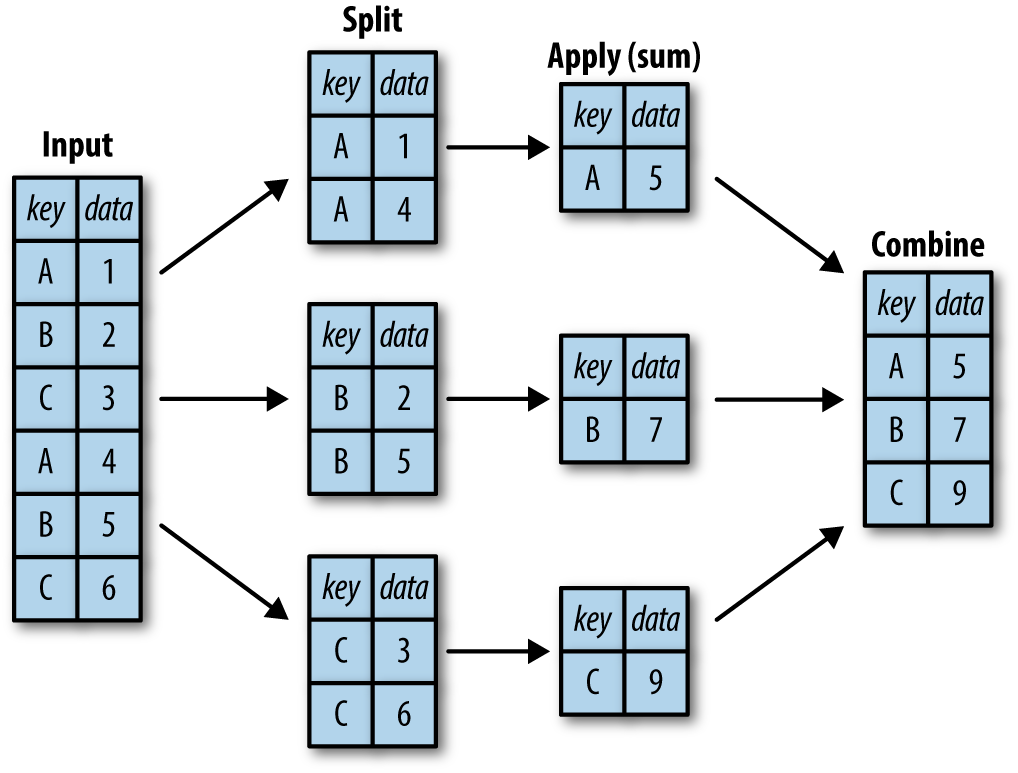

Q1. finding the Highest budget movie of every director


In [ ]:
data.groupby('director_name')['budget'].max()

director_name
Adam McKay                     100.0
Adam Shankman                   80.0
Alejandro González Iñárritu    135.0
Alex Proyas                    140.0
Alexander Payne                 30.0
                               ...  
Wes Craven                      40.0
Wolfgang Petersen              175.0
Woody Allen                     30.0
Zack Snyder                    250.0
Zhang Yimou                     94.0
Name: budget, Length: 199, dtype: float64

In [ ]:
data.groupby('director_name')['budget'].sum()

director_name
Adam McKay                     341.50000
Adam Shankman                  387.00000
Alejandro González Iñárritu    200.00000
Alex Proyas                    352.00000
Alexander Payne                 78.00000
                                 ...    
Wes Craven                     233.80000
Wolfgang Petersen              631.00000
Woody Allen                    212.00000
Zack Snyder                    860.00000
Zhang Yimou                    125.00011
Name: budget, Length: 199, dtype: float64

In [ ]:
data.groupby('director_name')['title'].count()

director_name
Adam McKay                      6
Adam Shankman                   8
Alejandro González Iñárritu     6
Alex Proyas                     5
Alexander Payne                 5
                               ..
Wes Craven                     10
Wolfgang Petersen               7
Woody Allen                    18
Zack Snyder                     7
Zhang Yimou                     6
Name: title, Length: 199, dtype: int64

--------------------
Q2. Which director is the most productive director  by * number of movies, quality-vote_average 


In [ ]:

data.groupby('director_name')['title'].count().sort_values(ascending=False)

director_name
Steven Spielberg    26
Clint Eastwood      19
Martin Scorsese     19
Woody Allen         18
Robert Rodriguez    16
                    ..
Paul Weitz           5
John Madden          5
Paul Verhoeven       5
John Whitesell       5
Kevin Reynolds       5
Name: title, Length: 199, dtype: int64

-----------------------
# Q. Number of movies directed per year


In [ ]:
data.groupby('director_name')['year'].min()

director_name
Adam McKay                     2004
Adam Shankman                  2001
Alejandro González Iñárritu    2000
Alex Proyas                    1994
Alexander Payne                1999
                               ... 
Wes Craven                     1984
Wolfgang Petersen              1981
Woody Allen                    1977
Zack Snyder                    2004
Zhang Yimou                    2002
Name: year, Length: 199, dtype: int64

In [ ]:
data.groupby('director_name')['year'].max()

director_name
Adam McKay                     2015
Adam Shankman                  2012
Alejandro González Iñárritu    2015
Alex Proyas                    2016
Alexander Payne                2013
                               ... 
Wes Craven                     2011
Wolfgang Petersen              2006
Woody Allen                    2013
Zack Snyder                    2016
Zhang Yimou                    2014
Name: year, Length: 199, dtype: int64

In [ ]:
# finding min and max in one line
# Calculating multiple aggregate
df_agg = data.groupby('director_name')[['year','title']].aggregate({'year':['min','max'],'title':'count'})

In [ ]:
df_agg

year       title
                              min   max count
director_name                                
Adam McKay                   2004  2015     6
Adam Shankman                2001  2012     8
Alejandro González Iñárritu  2000  2015     6
Alex Proyas                  1994  2016     5
Alexander Payne              1999  2013     5
...                           ...   ...   ...
Wes Craven                   1984  2011    10
Wolfgang Petersen            1981  2006     7
Woody Allen                  1977  2013    18
Zack Snyder                  2004  2016     7
Zhang Yimou                  2002  2014     6

[199 rows x 3 columns]

In [ ]:
df_agg.columns

MultiIndex([( 'year',   'min'),
            ( 'year',   'max'),
            ('title', 'count')],
           )

In [ ]:
df_agg['year']

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


In [ ]:
df_agg['title']

,count
director_name,
Adam McKay,6
Adam Shankman,8
Alejandro González Iñárritu,6
Alex Proyas,5
Alexander Payne,5
...,...
Wes Craven,10
Wolfgang Petersen,7
Woody Allen,18


In [ ]:
df_agg.columns

MultiIndex([( 'year',   'min'),
            ( 'year',   'max'),
            ('title', 'count')],
           )

In [ ]:
df_agg.columns= ["_".join(col) for col in df_agg.columns]

In [ ]:
df_agg.columns

Index(['year_min', 'year_max', 'title_count'], dtype='object')

In [ ]:
df_agg

,year_min,year_max,title_count
director_name,,,
Adam McKay,2004,2015,6
Adam Shankman,2001,2012,8
Alejandro González Iñárritu,2000,2015,6
Alex Proyas,1994,2016,5
Alexander Payne,1999,2013,5
...,...,...,...
Wes Craven,1984,2011,10
Wolfgang Petersen,1981,2006,7
Woody Allen,1977,2013,18


In [ ]:
df_agg.reset_index(inplace = True)

In [ ]:
df_agg

,director_name,year_min,year_max,title_count
0,Adam McKay,2004,2015,6
1,Adam Shankman,2001,2012,8
2,Alejandro González Iñárritu,2000,2015,6
3,Alex Proyas,1994,2016,5
4,Alexander Payne,1999,2013,5
...,...,...,...,...
194,Wes Craven,1984,2011,10
195,Wolfgang Petersen,1981,2006,7
196,Woody Allen,1977,2013,18
197,Zack Snyder,2004,2016,7


In [ ]:
df_agg['active_year'] = df_agg['year_max'] - df_agg['year_min'] 

In [ ]:
df_agg

,director_name,year_min,year_max,title_count,active_year
0,Adam McKay,2004,2015,6,11
1,Adam Shankman,2001,2012,8,11
2,Alejandro González Iñárritu,2000,2015,6,15
3,Alex Proyas,1994,2016,5,22
4,Alexander Payne,1999,2013,5,14
...,...,...,...,...,...
194,Wes Craven,1984,2011,10,27
195,Wolfgang Petersen,1981,2006,7,25
196,Woody Allen,1977,2013,18,36
197,Zack Snyder,2004,2016,7,12


In [ ]:
#calculating movie per year 
df_agg["movie_per_yr"] = df_agg["title_count"] / df_agg["active_year"]

In [ ]:
df_agg

,director_name,year_min,year_max,title_count,active_year,movie_per_yr
0,Adam McKay,2004,2015,6,11,0.545455
1,Adam Shankman,2001,2012,8,11,0.727273
2,Alejandro González Iñárritu,2000,2015,6,15,0.400000
3,Alex Proyas,1994,2016,5,22,0.227273
4,Alexander Payne,1999,2013,5,14,0.357143
...,...,...,...,...,...,...
194,Wes Craven,1984,2011,10,27,0.370370
195,Wolfgang Petersen,1981,2006,7,25,0.280000
196,Woody Allen,1977,2013,18,36,0.500000
197,Zack Snyder,2004,2016,7,12,0.583333


In [ ]:
df_agg.sort_values('movie_per_yr',ascending=False).head()

,director_name,year_min,year_max,title_count,active_year,movie_per_yr
190,Tyler Perry,2006,2013,9,7,1.285714
73,Jason Friedberg,2006,2010,5,4,1.250000
169,Shawn Levy,2002,2014,11,12,0.916667
158,Robert Rodriguez,1992,2014,16,22,0.727273
1,Adam Shankman,2001,2012,8,11,0.727273


-------------

# Group based filtering - filters rows, but based on group based property 

In [ ]:
# find names of directors who have directed 100m movies
df_dir_budget=data.groupby('director_name')['budget'].max()
df_dir_budget

director_name
Adam McKay                     100.0
Adam Shankman                   80.0
Alejandro González Iñárritu    135.0
Alex Proyas                    140.0
Alexander Payne                 30.0
                               ...  
Wes Craven                      40.0
Wolfgang Petersen              175.0
Woody Allen                     30.0
Zack Snyder                    250.0
Zhang Yimou                     94.0
Name: budget, Length: 199, dtype: float64

In [ ]:
df_dir_budget >= 100 # it's a series

director_name
Adam McKay                      True
Adam Shankman                  False
Alejandro González Iñárritu     True
Alex Proyas                     True
Alexander Payne                False
                               ...  
Wes Craven                     False
Wolfgang Petersen               True
Woody Allen                    False
Zack Snyder                     True
Zhang Yimou                    False
Name: budget, Length: 199, dtype: bool

In [ ]:
# convert series to DataFrame
df_dir_budget=data.groupby('director_name')['budget'].max().reset_index()
df_dir_budget

,director_name,budget
0,Adam McKay,100.0
1,Adam Shankman,80.0
2,Alejandro González Iñárritu,135.0
3,Alex Proyas,140.0
4,Alexander Payne,30.0
...,...,...
194,Wes Craven,40.0
195,Wolfgang Petersen,175.0
196,Woody Allen,30.0
197,Zack Snyder,250.0


In [ ]:
df_dir_budget['budget']>=100

0       True
1      False
2       True
3       True
4      False
       ...  
194    False
195     True
196    False
197     True
198    False
Name: budget, Length: 199, dtype: bool

In [ ]:
df_dir_budget.loc[df_dir_budget['budget']>=100, 'director_name']

0                       Adam McKay
2      Alejandro González Iñárritu
3                      Alex Proyas
5                   Andrew Adamson
10                         Ang Lee
                  ...             
187                    Tom Shadyac
188                     Tom Tykwer
189                     Tony Scott
195              Wolfgang Petersen
197                    Zack Snyder
Name: director_name, Length: 85, dtype: object

------------------
Q1. filtering all rows (movies) which are directed by high budget directors

In [ ]:
data.groupby('director_name').filter(lambda x:x["budget"].max() >= 100)


,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.00,150,2787.965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.00,139,961.000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.00,107,880.674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.00,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.00,115,890.871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,48267,0.40,33,100.000000,Mad Max,6.6,1213,1979,Apr,Thursday,George Miller,Male
1451,48268,0.20,13,4.505922,Swingers,6.8,253,1996,Oct,Friday,Doug Liman,Male
1452,48274,0.00,5,2.611555,Three,6.3,31,2010,Dec,Thursday,Tom Tykwer,Male
1458,48335,0.06,27,3.221152,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male


In [ ]:
data.groupby("director_name").filter(lambda x: x["budget"].max() >= 100)["director_name"].nunique()

85

--------

# Group based transformation - transformation of features using their group properties

# Feature/Column Transformation - Budget/Revenue dollors -> m dollars

Q1. assess every movie wrt director average budget.

A - 100 50 150., average budget 100 cr, 

100 - 0

50 - -50

150 = +50

In [ ]:
def subtract_avg(x):
  return x - x.mean()
data['additional_budget'] =data.groupby('director_name')['budget'].transform(subtract_avg)
# transform function works with a column/series and not a dataframe

In [ ]:
data['additional_budget']

0       130.300000
1       141.857143
2       150.142857
3       124.375000
4       174.004545
           ...    
1460    -47.478947
1461    -11.979417
1462    -21.700000
1463    -10.890909
1464    -31.168750
Name: additional_budget, Length: 1465, dtype: float64

In [ ]:
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,additional_budget
0,43597,237.000,150,2787.965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,130.300000
1,43598,300.000,139,961.000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,141.857143
2,43599,245.000,107,880.674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,150.142857
3,43600,250.000,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,124.375000
4,43602,258.000,115,890.871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,174.004545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0.000,3,0.321952,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male,-47.478947
1461,48370,0.027,19,3.151130,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male,-11.979417
1462,48375,0.000,7,0.000000,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male,-21.700000
1463,48376,0.000,3,0.000000,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male,-10.890909


-----------------
Q2. for a movie, if it was risky for a director or not - whose budget was even higher than average revenue of the movies director by same director

In [ ]:
def func(x):
  x["risky"] = x["budget"] - x["revenue"].mean() >= 0
  return x

df_risky = data.groupby("director_name").apply(func)

In [ ]:
df_risky

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,additional_budget,risky
0,43597,237.000,150,2787.965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,130.300000,False
1,43598,300.000,139,961.000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,141.857143,False
2,43599,245.000,107,880.674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,150.142857,False
3,43600,250.000,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,124.375000,False
4,43602,258.000,115,890.871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,174.004545,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0.000,3,0.321952,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male,-47.478947,False
1461,48370,0.027,19,3.151130,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male,-11.979417,False
1462,48375,0.000,7,0.000000,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male,-21.700000,False
1463,48376,0.000,3,0.000000,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male,-10.890909,False


In [ ]:
df_risky.loc[df_risky['risky']==True]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,additional_budget,risky
7,43608,200.0,107,586.090727,Quantum of Solace,6.1,2965,2008,Oct,Thursday,Marc Forster,Male,136.312500,True
12,43614,380.0,135,1045.713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,May,Saturday,Rob Marshall,Male,252.000000,True
15,43618,200.0,37,310.669540,Robin Hood,6.2,1398,2010,May,Wednesday,Ridley Scott,Male,119.375000,True
20,43624,209.0,64,303.025485,Battleship,5.5,2114,2012,Apr,Wednesday,Peter Berg,Male,111.666667,True
24,43630,210.0,3,459.359555,X-Men: The Last Stand,6.3,3525,2006,May,Wednesday,Brett Ratner,Male,119.666667,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,47224,5.0,7,3.263585,The Sweet Hereafter,6.8,103,1997,May,Wednesday,Atom Egoyan,Male,-2.500000,True
1349,47229,5.0,3,4.842699,90 Minutes in Heaven,5.4,40,2015,Sep,Friday,Michael Polish,Male,0.800000,True
1351,47233,5.0,6,0.000000,Light Sleeper,5.7,15,1992,Aug,Friday,Paul Schrader,NaN,-1.208333,True
1356,47263,15.0,10,0.000000,Dying of the Light,4.5,118,2014,Dec,Thursday,Paul Schrader,NaN,8.791667,True
